## R-CNN(Regions With CNN)

![nn](./image_files/Object_Detection.png)

- Localization과 Classification의 가장 큰 차이는 찾고자하는 Object의 위치를 찾는것의 차이가 있다.
- 위의 이미지에서 Feature Extrator로 Feature Map을 만들고 FC(Fully Connected Layer)에서 분류하는 것은 기존 분류 모델과 똑같다.
- 다른점은 이미지에서 찾고자 하는 Object의 위치에 해당하는 좌표값을 Bounding Box Regression을 통해서 해당 Object의 위치를 찾는다는 차이가 있다.
- Detect할 Object의 개수가 2개 이상일 경우에 Object Detection이라고 한다.(1개의 이미지에 1개의 Object인 경우 Localization이라 한다.)
- 이렇게 Classification과 Bounding Box Regression이 2개의 모델을 가지고 있는 모델이 Object Localiztion과 Object Detection이라고 한다.


![s](./image_files/2017-05-27-faster-r-cnn-selective-search.png)

- Object Detection의 경우는 단순히 Classification과 Bounding Box Regression 2개의 모델만으로는 Object Detection을 할 수가 없다. 그래서 Region Proposal 방법을 사용해서 Object가 있을 만한 영역 예측한다.

- 예전에는 Sliding Window 방법을 Object가 있을만한 위치를 예측했다. 다만, Sliding Window 방법은 Object를 찾기위한 윈도우의 크기와 모영을 다양하게, 왼쪽에서 오른쪽으로, 위에서 아래로 이동하면서 Object를 찾았고, image scale에 많은 영향을 받고 또, 느려서 지금은 사용하지 않는 방법이다. 

- Sliding Window 방법 다음으로 인정 받은 방법이 Region Proposal 방식에 Selective Search이다.
- Selective Search의 경우 원본 이미지에서 색, 형탱, 비슷한 Pixel 등등을 Segmentation하고 합쳐나가 Object가 있을 만한 위치를 찾아주는 방법이다.  

![nn2](./image_files/image.png)

- RCNN은 Region Proposal의 Selective Search를 사용한 최초의 모델이다.
- 그래서 RCNN은 2개지 영역으로 나누어져 있다. Region Proposal과 CNN Detection 영역으로 나누어져 나누어져 있다.
- RCNN은 Region Proposal을 이용해서 1개의 이미지에서 Object가 있을 만한 위치를 2000개를 추천해 주는데, 찾은 이미지들을 동일한 사이즈로 맞추고 CNN모델에 입력해서 학습을 시킨다.
- 모두 동일한 크기로 맞추어야된다. 이 논문에서 사용한 AlexNet의 경우, Input Size가 227x227이므로 동일한 사이즈로 해주어야한다. 또한, Feature Map에서 뽑은 Featrue Map의 크기가 이미 정해져 있어서, 다른 크기의 이미지를 넣을 수 없다.
- RCNN에서는 이미지를 자르는데는 Crop와 이미지 모양을 동일하게 맞추기 위한 Warp를 사용했다.
- RCNN에서의 특이한 점은 마지막에 Softmax와 Sigmoid 함수를 사용한 것이 아닌 SVM Classifier를 사용했다.
- 즉, RCNN에서 FC layer에서 나온 Feature를 SVM(Support Vector Machine)을 이용해 분류를 한다는 것이다.
- Softmax 함수를 사용하지 않은 이유는 모델의 성능 지표인 mAP가 50.9%인 것에 비해서 SVM(Support Vector Machine)으로 분류하면  mAP 54.2%로 높게 나왔다. 즉, 경험에 의한 선택인 것이다.


- RNN은 1개의 이미지당 2000개에 해당하는 영역을 학습해야 된다. 즉, inference도 느릴 수 밖에 없다.

![nn3](./image_files/image2.png)

- 아래 이미지에는 P와 G라는 2개의 Bounding Box가 있다. 여기서 P는 Bounding Box Regression으로 예측한 Prediction Bounding Box(Selective Search에 의해 추천된 Bounding Box)이고 G는 Ground Truth Bounding Box(실제 Object가 있는 Bounding Box(정답 Boundin Box))이다.


- 여기서 P를 정답인 G에 맞추도록 하는 것이 Bounding Box Regression의 목표이다.

![nn3](./image_files/image3.png)

- 여기서 G는 Ground Truth의 좌표이고, P는 Selective Seach가 추천해준 Object의 좌표이다.
- 위의 공식은 맨위에 있는 공식은 예측한 Bounding Box의 좌표이다. 각각 x, y, width, height이다.
- 맨위에 공식에서 dx, dy, dw, dh는 모델이 이 학습을 통해서 예측한 값이다.
- 가운데 있는 공식에 짤간 줄이 di에 해당된다. di에서 i값에 각각의 x,y,w,h 값이 들어간다 t도 마찬가지로, x,y,w,h가 들어가 해당 ti의 값과 di의 값이 차이가 점점 줄어들게하는 방식으로 결과 값을 예측한다.
- 마지막 공식은 ti 즉, target 좌표이다.

### R-CNN의 장단점
- 장점
    - 높은 정확도: 동시대의 다른 알고리즘 대비 매우 높은 Detection 정확도를 가지고 있음


- 단점
    - 너무 느린 Detection 시간과 복잡한 아키텍처 및 학습 프로세스
    - 하나의 이미지마다 Selective Search를 수행해서 2000개의 Region 영역이미지를 도출
    - 개별 이미지별로 2000개씩 생성되는 Region 이미지를 CNN Feature map 생성
    - 각기 딸로 노는 구성 요소들을 Selective Seach, CNN Feature Extractor, SVM과 Bounding Box로 구성되어 복잡한 프로레스를 거쳐서 학습 및 Object Detection이 되어야함.
    - 1장의 이미지를 Objec Detection 하는데 약 50초가 소요된다.

## Fast RCNN

![nn](./image_files/CE2Pj.png)

- Fast-R-CNN은 R-CNN과는 다르게 마지막 예측 결과를 SVM이 아닌 SoftMax를 적용 -> 드이어 딥러닝만으로 예측가능 ~!!! 하지만 아직 Region Propsal이 Deep learning Model이 아님
- Fast-R-CNN도 R-CNN과 마찬가지로 Selective Search사용했고,  Roi Pooling을 적용함
- Fast-R-CNN은 하나의 이미지에서 나온 Feature들을 Roi Pooling을 적용한다.

### Roi Pooling Layer

![nn1](./image_files/spp_net.png)

- Fast RCNN은 기존에 있던 RCNN의 1개의 이미지당 2000개의 Region Proposal 학습하기 때문에 오래 시간이 걸인다는 단점을 SPP-Net의 Spatial pyramid pooling을 기반으로한 Roi Pooling으로 이러한 문제를 극복했다.



- Spatial pyramid pooling이란 .. ?
    - Feature Extractor로 추출한 Feature Map을 각각의 위치를 쪼개주는 방법을 사용한다. 16x256의 경우 (4x4)x256로 나누어 해당 이미지의 Feature를 찾고 Max Pooling을 사용해 Fixed Max로 Mapping하는 방법이다.

    - 각각의 위치를 쪼갠 것을 합치면 (16 + 4 + 1) x 256에 해당되는 Feature들을 Fixed Max로 Mapping한다고 생각하면 된다.

- Fast RCNN은 End-to-End Network Learning을 사용해서(Region Proposal은 제외) SVM을 Softmax로 변환하고, Multi-task Loss 함수를 적용해 Classification과 Bounding Box Regression을 함께 최적화 하는 방법을 사용했다.

### Roi Pooling에 대해서 알아보자
- 아래 이미지는 Region Proposal에 Selective Search의해 추천된 Object가 있을만한 위치이다.

![nn1](./image_files/region.png)

- 아래 이미지는 Feture Map 상의 임의의 Roi를 고정 크기의 Pooling 영역으로 Mapping하고, Mapping 시 일반적인 Max Pooling을 적용했다.
![nn3](./image_files/roi_pooling2.png)

- Roi의 Max pooling은 기존에 알고 있던 Maxpooling과는 조금 다르다.

- 위에서 처럼 Sselective Search로 찾은 Object가 있을 만한 영역을 찾는다.
![nn4](./image_files/region2.png)

- VGG를 사용했다면, input shape이 (224 x 224) 또는 (448 x 448)이 있다. 만약 input shaep이 (224 x 224)일 경우  Pool Map의 크기는 7x7이고, (448 x 448)일 경우, 14 x 14이다.

![nn5](./image_files/roi_pooling3.png)

- 위에서 예제 이미지에서 SS(Selective Search)는 14x7에 해당하는 영역과 8x4에 해당하는 영역을 추천해줬다. 우선 14x7에 해당하는 영역을 Pool Map으로 나누어주면 (14/7 = 2 x 7/7 = 1) = (2 x 1)인 Max Pooling Filter가 만들어지고, 이후는 기존과 동일안 방법으로 Pool Map에 값을 추출하게 됩니다.


- (14 x 7)의 경우, (7 x 7)로 나누어져 해당되는 방법을 사용할 수 있지만, (8 x 4)의 경우는 어찌 해야될까요 .. ? 답은 바로 보간법을 적용하는 것입니다. 이미지 보관법은 Opencv의 image resize 방법처럼 이미지의 크기를 늘릴 때, 해당 픽셀과 근처 픽셀의 값을 계산해서 이미지의 크기를 늘리는 방법입니다.


- Fast RCNN은 tf.image.resize를 사용해서, (8x4) 크기의 이미지를 (7 x 7)로 사이즈를 변경해서 Mapping을 하게됩니다.


- 따라서 이러한 방법으로 이미지마다 여러개의 7x7 Matrix가 생기게 됩니다. 이 예에서는 2개의 7 x 7 Matrix가 생기게 됩니다.

### Fast RCNN의 구조

![nn6](./image_files/fastrcnn.png)

- 위 이미지에서 Feature Map에서 Selective Search로 찾은 Object가 있을 만한 영역의 크기가 달라도 Roi Pooling layer의 (7 x 7)로 사이즈를 변경해 입력합니다.

- RCNN에서 처럼 1개의 이미지에서 찾은 2000개의 추정되는 영역들이 있으므로 (200,7,7)이된다. 여기서 Batch 사이즈가 4이고 Feature Map의 depth가 256이라면 적용하면 최종적으로 (4, 2000, 7, 7, 256)이된다.

- 또한, Feature Map의 갯수가 만약에 256개이면 Roi Pooling 또는 256개가 존재한다.

![nn7](./image_files/mutitask_loss.png)
![nn8](./image_files/regression_loss.png)

- RCNN과는 다르게 Roi Pooling이 가능하게 되면서, Classificaion Loss와 Regression Loss 사용한 Muti-task Loss 함수를 사용할 수 있게되었다.


- 특이한 점은 Regression Loss 함수는 L1 Loss를 사용하는데 L1 Loss는 실제 값에서 예측 값을 빼고, 절대값을 적용한 Loss입니다. 만약 Loss가 1보다 작으면, 해당 결과 값의 제곱에 0.5를 곱하고, 그 외의 경우  Loss에 절대 값에 0.5를 뺀 값으로 바뀌게 된니다.


- L2 Loos의 경우, 실제 값에 예측 값을 뺀 값을 제곱한 값이다.  

## Faster RCNN의 개요
- Faster RCNN = RPN + Fast RCNN
    - 여기서 Region Proposal Network(RPN)이 나오면서, 온전한 Deep Learning만으로 만들 수 있게 되었다.
![nn8](./image_files/faster_rcnn.png)

- faster RCNN에서는 그동안 사용했던 Selective Search를 Neural Network 구조, 즉, RPN으로 변경되면서 GPU를 사용한 빠른 학습과 Inference가 가능해졌고, End-to-End Network(Multi-task Loss)학습이 가능하게되었다.

### RPN의 구현 이슈
![nn9](./image_files/RPN1.png)


- Selective Search에서는 2000개에 해당하는 영역을 추천해준다. 너무 많은 Object들을 추천해준다.
- 2000개를 추천해주면 학습과 Inference가 느려지는 안 좋은 단점들을 해결하기 위해서 RPN을 구현 ~ !
- RPN을 구현하기 위해서 가지고 있는 데이터는 pixel 값과 Target은 Ground Truth Bounding Box 2개이지만 이거 가지고는 RPN을 구현 할 수 없기 때문에 Anchor Box를 이용해서 Object가 있는지 없는지의 후보 Box들을 어떤 포인트 별로 촘촘하게 채워진 anchor Box 학습해서 Object의 위치를 찾게 되는 방법으로 구현한다.
- 즉, GT(Ground Truth)를 기반의 데이터를 넣어서 Anchor 박스를 학습 시키자 라는 것에 의의를 두고 나온 것이 RPN이다.

### Anchor Box의 구성
![nn10](./image_files/anchor1.png)

- Anchor 박스의 Scale은 (128 x 128)의 경우 1배, (256 x 256)의 경우 2배, (512 x 512)의 경우 4배의 크기로 되어 있고, Ratio가 1:2이면 가로가 길어지고, 2:1이면 세로가 길어진다. 

- 실제 Anchor Box는 Image Mapping이 아니라 Feature Map에 Mapping하게 된다. 만약에 Feature Map의 사이즈가 실제 이미지의 크기에 1/16 사이즈로 크기가 줄어든다면, Anchor Box의 Size가 1/16로 줄어든다.

- 형태도, 사이즈도 다른 Anchor Box가 9개가 만들어 진다. anchor Box를 9개를 만드는 이유는 Object의 크기가 다 각각 다르기 때문이다.


![nn11](./image_files/anchor2.png)
- 다양한 크기의 Object가 있기 때문에, 사진에서 Object Detect 하기 위해서 다양한 Anchor Box가 필요하다. 만약 Anchor Box 2만 가지고 영역을 추천하게 되면, 사람은 찾지 못하기 때문에 다양한 Anchor Box가 필요하다. 또, Anchor Box는 Point(어떤 중심점)를  기반으로 다양한 Anchor Box가 생기게 된다.


![nn12](./image_files/anchor3.png)


- width는 800, height는 600의 이미지가 1/16의 크기의 Feature Map으로 Down Sampling 되면, 50 x 38의 크기가되고, 50 x 38 크기의 Grid Point가 생기고, 해당 Grid Point 마다 Anchor Box를 그려주게 된다.

- 최종적으로 다음 이미지 처럼 된다.

![nn13](./image_files/anchor4.png)



- 즉, Anchor 박스의 개수는 grid의 개수 곱하기 grid point 별 9개의 Anchor Box가 있으니, 50 x 38 x 9로  총 17100개의 Anchor Box가 만들어 진다.

### RPN의 개요
- RPN은 Anchor Box를 기반의 학습을 통해서 Object가 있을 만한 영역을 추천해준다.

![nn14](./image_files/anchor5.png)

### RPN 네트웍 구성
![nn17](./image_files/anchor6.png)

- 512개의 Chennel의 3x3의 Conv을 적용해서 40 x 50의 동일한 크기와 Depth로 나오게 된다.
- 그리고 3x3의 Conv의 output을 1x1 Conv를 통해서 이진 분류를 통해서 해당 부분이 오브젝트인가 아닌가를 분류한다.
    - 1x1 Conv은 Feature Map에 차원의 파라미터를 대폭적으로 줄이면서 모델의 성능에 최소한의 영향도를 가지면서 차원 축소를 하는 기능을 한다. 40 x 50의 크기는 변하지 않지만, Depth가 변하게 된다. 즉, 512개의 Depth가 9개로 줄어든다. 9개 -> Anchor의 갯수를 의미
    - 즉, 40 x 50 x 9 = 18000개의 Anchor Box가 존재하게 되고, 18000개의 Anchor Box로 Object인지 아닌지를 분류하게 된다.
- 그리고 바로 1x1 Conv의 4 x 9개도 동일한 방법으로 output이 나오게 된다.
    - 40 x 50 x 9 x 4개의 정보를 가지고 있다.
    
    
![nn18](./image_files/RPN.png)


- RPN Bounding Box Regression은 Anchor Box를 Reference로 이용해서 Ground Truth와 예측 Bounding Box의 중심 좌표 x,y 그리고 w,h의 차이가 Anchor Box와 Ground Truth 간의 중심 좌표 x,y,w,h의 차이와 최대한 동일하게 예측될 수 있어야한다.

- 즉, GT와 Prediction Bounding 박스의 ti의 값과 Anchor box와 GT의 ti의 값이 같아지면 최대한 비슷하게 GT를 예측하게 된다는 것이다.

## Opencv의 DNN으로 Faster RCNN 실습해보기
- Opencv의 DNN의 장단점
    - 장점
        - 딥러닝 개발 프레임 워크 없이 쉽게 inference 구현이 가능하다.
        - Opencv에서 지원하는 다양한 Cumputer Vision 처리 API와 Deep learning을 쉽게 결합할 수 있다.
    - 단점
        - GPU 지원이 약하다 즉, CPU로 진행
        - DNN 모듈은 과에는 NVIDIA GPU가 지원이 안됐으나 2019년 10월에 Google에서 NVIDIA GPU 지원을 발표했다. 하지만 아직 환경 구성과 설치에 어려움이 있다. 아마 점차 개선 되어질 것으로 보인다.
        - Opencv는 새로운 데이터의 학습이 제동되지 않아 오직 Inference만 수행이 가능하다.
        - CPU 기반에서의 Inference 속도가 개선 되었으나, 아직 GPU(NVIDIA) 지원 여건이 안정적이지 않다.

### OpenCV DNN 패키지를 이용하여 Faster R-CNN 기반의 Object Detection 수행
* Tensorflow 에서 Pretrained 된 모델 파일을 OpenCV에서 로드하여 이미지와 영상에 대한 Object Detection 수행. 

#### 입력 이미지로 사용될 이미지 다운로드/보기

In [1]:
!pwd

/media/bgw2001/One Touch/study/company_study/RCNN_Fast_RCNN


In [2]:
!mkdir data

In [4]:
!ls -ail

total 1536
712 drwxr-xr-x 5 bgw2001 bgw2001 262144  9월 13 00:57 .
709 drwxr-xr-x 4 bgw2001 bgw2001 262144  9월 11 21:41 ..
801 drwxr-xr-x 2 bgw2001 bgw2001 262144  9월 13 00:57 data
778 drwxr-xr-x 3 bgw2001 bgw2001 262144  9월 12 17:26 image_files
781 drwxr-xr-x 2 bgw2001 bgw2001 262144  9월 11 21:44 .ipynb_checkpoints
779 -rwxr-xr-x 1 bgw2001 bgw2001  20266  9월 13 00:53 RCNN_FastRCNN_FasterRCNN.ipynb


In [6]:
!wget -O ./data/beatles01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg

--2021-09-13 01:02:14--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 383118 (374K) [image/jpeg]
Saving to: ‘./data/beatles01.jpg’

./data/beatles01.jp 100%[===================>] 374.14K  --.-KB/s    in 0.1s    

2021-09-13 01:02:14 (2.61 MB/s) - ‘./data/beatles01.jpg’ saved [383118/383118]



image shape: (633, 806, 3)


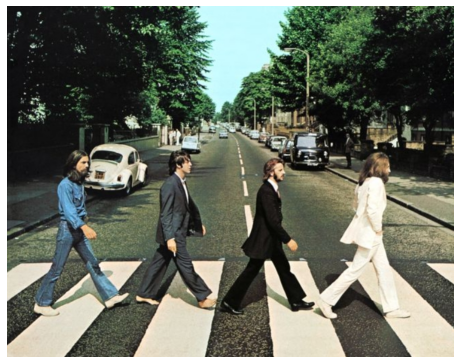

In [6]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread("./data/beatles01.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print("image shape:", img.shape)

plt.figure(figsize = (8,8))
plt.imshow(img)
plt.axis("off")
plt.show()

#### Tensorflow에서 Pretrained 된 Inference모델(Frozen graph)와 환경파일을 다운로드 받은 후 이를 이용해 OpenCV에서 Inference 모델 생성
* https://github.com/opencv/opencv/wiki/TensorFlow-Object-Detection-API 에 다운로드 URL 있음.
* pretrained 모델은 http://download.tensorflow.org/models/object_detection/faster_rcnn_resnet50_coco_2018_01_28.tar.gz 에서 다운로드 후 압축 해제
* pretrained 모델을 위한 환경 파일은 https://github.com/opencv/opencv_extra/blob/master/testdata/dnn/faster_rcnn_resnet50_coco_2018_01_28.pbtxt 에서 다운로드 
* download된 모델 파일과 config 파일을 인자로 하여 inference 모델을 DNN에서 로딩함. 

In [8]:
!mkdir ./pretrained
!ls -ail

total 2048
712 drwxr-xr-x 6 bgw2001 bgw2001 262144  9월 13 01:05 .
709 drwxr-xr-x 4 bgw2001 bgw2001 262144  9월 11 21:41 ..
801 drwxr-xr-x 2 bgw2001 bgw2001 262144  9월 13 01:02 data
778 drwxr-xr-x 3 bgw2001 bgw2001 262144  9월 12 17:26 image_files
781 drwxr-xr-x 2 bgw2001 bgw2001 262144  9월 11 21:44 .ipynb_checkpoints
839 drwxr-xr-x 2 bgw2001 bgw2001 262144  9월 13 01:05 pretrained
779 -rwxr-xr-x 1 bgw2001 bgw2001 452792  9월 13 01:04 RCNN_FastRCNN_FasterRCNN.ipynb


### model  다운로드

In [9]:
!wget -O ./pretrained/faster_rcnn_resnet50_coco_2018_01_28.tar.gz http://download.tensorflow.org/models/object_detection/faster_rcnn_resnet50_coco_2018_01_28.tar.gz
!wget -O ./pretrained/config_graph.pbtxt https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/faster_rcnn_resnet50_coco_2018_01_28.pbtxt

--2021-09-13 01:05:50--  http://download.tensorflow.org/models/object_detection/faster_rcnn_resnet50_coco_2018_01_28.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 34.64.4.16, 2404:f340:10:1800::2010
Connecting to download.tensorflow.org (download.tensorflow.org)|34.64.4.16|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 381355771 (364M) [application/x-tar]
Saving to: ‘./pretrained/faster_rcnn_resnet50_coco_2018_01_28.tar.gz’

./pretrained/faster 100%[===================>] 363.69M  15.1MB/s    in 22s     

2021-09-13 01:06:13 (16.7 MB/s) - ‘./pretrained/faster_rcnn_resnet50_coco_2018_01_28.tar.gz’ saved [381355771/381355771]

--2021-09-13 01:06:13--  https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/faster_rcnn_resnet50_coco_2018_01_28.pbtxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubuse

### 압축해제 

In [10]:
!tar -xvf ./pretrained/faster*.tar.gz -C ./pretrained 

faster_rcnn_resnet50_coco_2018_01_28/
faster_rcnn_resnet50_coco_2018_01_28/model.ckpt.index
faster_rcnn_resnet50_coco_2018_01_28/checkpoint
faster_rcnn_resnet50_coco_2018_01_28/pipeline.config
faster_rcnn_resnet50_coco_2018_01_28/model.ckpt.data-00000-of-00001
faster_rcnn_resnet50_coco_2018_01_28/model.ckpt.meta
faster_rcnn_resnet50_coco_2018_01_28/saved_model/
faster_rcnn_resnet50_coco_2018_01_28/saved_model/saved_model.pb
faster_rcnn_resnet50_coco_2018_01_28/saved_model/variables/
faster_rcnn_resnet50_coco_2018_01_28/frozen_inference_graph.pb


In [11]:
#제대로 압축을 해제에 성공했는지 확인
!pwd
!ls -ail ./pretrained/faster_rcnn_resnet50_coco_2018_01_28

/media/bgw2001/One Touch/study/company_study/RCNN_Fast_RCNN
total 297728
843 drwxr-xr-x 3 bgw2001 bgw2001    262144  2월  2  2018 .
839 drwxr-xr-x 3 bgw2001 bgw2001    262144  9월 13 01:06 ..
845 -rwxr-xr-x 1 bgw2001 bgw2001        77  2월  2  2018 checkpoint
852 -rwxr-xr-x 1 bgw2001 bgw2001 120549957  2월  2  2018 frozen_inference_graph.pb
847 -rwxr-xr-x 1 bgw2001 bgw2001 176914228  2월  2  2018 model.ckpt.data-00000-of-00001
844 -rwxr-xr-x 1 bgw2001 bgw2001     14460  2월  2  2018 model.ckpt.index
848 -rwxr-xr-x 1 bgw2001 bgw2001   5675175  2월  2  2018 model.ckpt.meta
846 -rwxr-xr-x 1 bgw2001 bgw2001      3240  2월  2  2018 pipeline.config
849 drwxr-xr-x 3 bgw2001 bgw2001    262144  2월  2  2018 saved_model


#### dnn에서 readNetFromTensorflow()로 tensorflow inference 모델을 로딩

In [3]:
import cv2

pb_path = "./pretrained/faster_rcnn_resnet50_coco_2018_01_28/frozen_inference_graph.pb"
pbtxt_path = "./pretrained/config_graph.pbtxt"

cv_net = cv2.dnn.readNetFromTensorflow(pb_path, pbtxt_path)

In [4]:
# OpenCV Tensorflow Faster-RCNN용
labels_to_names_0 = {0:'person',1:'bicycle',2:'car',3:'motorcycle',4:'airplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',
                    10:'fire hydrant',11:'street sign',12:'stop sign',13:'parking meter',14:'bench',15:'bird',16:'cat',17:'dog',18:'horse',19:'sheep',
                    20:'cow',21:'elephant',22:'bear',23:'zebra',24:'giraffe',25:'hat',26:'backpack',27:'umbrella',28:'shoe',29:'eye glasses',
                    30:'handbag',31:'tie',32:'suitcase',33:'frisbee',34:'skis',35:'snowboard',36:'sports ball',37:'kite',38:'baseball bat',39:'baseball glove',
                    40:'skateboard',41:'surfboard',42:'tennis racket',43:'bottle',44:'plate',45:'wine glass',46:'cup',47:'fork',48:'knife',49:'spoon',
                    50:'bowl',51:'banana',52:'apple',53:'sandwich',54:'orange',55:'broccoli',56:'carrot',57:'hot dog',58:'pizza',59:'donut',
                    60:'cake',61:'chair',62:'couch',63:'potted plant',64:'bed',65:'mirror',66:'dining table',67:'window',68:'desk',69:'toilet',
                    70:'door',71:'tv',72:'laptop',73:'mouse',74:'remote',75:'keyboard',76:'cell phone',77:'microwave',78:'oven',79:'toaster',
                    80:'sink',81:'refrigerator',82:'blender',83:'book',84:'clock',85:'vase',86:'scissors',87:'teddy bear',88:'hair drier',89:'toothbrush',
                    90:'hair brush'}

### 단일 이지미의 결과 값을 확인해보면 다음과 같다.

In [7]:
cv_net.setInput(cv2.dnn.blobFromImage(img, swapRB = True, crop = False))
output = cv_net.forward()
output

array([[[[0.00000000e+00, 0.00000000e+00, 9.99721825e-01,
          2.78515399e-01, 4.12082016e-01, 4.65952396e-01,
          8.66308749e-01],
         [0.00000000e+00, 0.00000000e+00, 9.98739660e-01,
          5.46474457e-02, 3.97055745e-01, 2.64206767e-01,
          8.97035480e-01],
         [0.00000000e+00, 0.00000000e+00, 9.97658253e-01,
          4.81150717e-01, 4.39398587e-01, 6.87897563e-01,
          8.95111620e-01],
         [0.00000000e+00, 0.00000000e+00, 9.97409284e-01,
          6.92559838e-01, 3.92650753e-01, 8.99708033e-01,
          9.30144072e-01],
         [0.00000000e+00, 0.00000000e+00, 8.72676373e-01,
          7.57561386e-01, 3.62566710e-01, 7.85598338e-01,
          4.63006854e-01],
         [0.00000000e+00, 2.00000000e+00, 8.61572444e-01,
          5.84399283e-01, 3.69541794e-01, 6.29509985e-01,
          4.14426476e-01],
         [0.00000000e+00, 2.00000000e+00, 8.45811069e-01,
          1.78797185e-01, 3.94615471e-01, 3.15651357e-01,
          5.49973309e-01],

- 위에 output 파일을 보면 array안에 리스트, 리스트 안에 리스트인 구조를 하고 있다.
- 따라서 내가 접근하고자 하는 데이터에 접근하기 위해서는 output[0,  0,  :,  :]을 해야지만 접근이 가능하다.
- 순서대로 보면 output의 첫 번째 0은 array 안에 리스트를 두번째 0은 리스트안에 리스트를 꺼낸다는 의미이다. :은 모든 데이터를 가져온다는 뜻이다.
- output[0,  0,  0,  :] 이면, 첫 번째 0은 array 안에 리스트를 두번째 0은 리스트안에 리스트를 꺼내고, 세번재 0은 모델이 찾은 0번째 Object의 정보를 의미한다.

In [30]:
print("제일 첫 번째 결과 값을 가져와 보자")
res = output[0,0,0,:]
print("class id:",res[1])
print("class_id의 label:", labels_to_names_0[res[1]])
print("confidence score:",res[2])
print("좌표 값:",res[3:7])
print("여기서 좌표 값이 소수점인 이유는 scale이된 값으로 예측되어서 다시 원본 이미지 비율로 계산해주면 된다.")
r,c = img.shape[:2]
print("원본 좌표 값:", end = "")
print("[",int(res[3] * c)," ",end = "")
print(int(res[4] * r)," ",end = "")
print(int(res[5] * c)," ",end = "")
print(int(res[6] * r),"]")

제일 첫 번째 결과 값을 가져와 보자
class id: 0.0
class_id의 label: person
confidence score: 0.9997218
좌표 값: [0.2785154  0.41208202 0.4659524  0.86630875]
여기서 좌표 값이 소수점인 이유는 scale이된 값으로 예측되어서 다시 원본 이미지 비율로 계산해주면 된다.
원본 좌표 값:[ 224  260  375  548 ]


#### 이미지를 preprocessing 수행하여 Network에 입력하고 Object Detection 수행 후 결과를 이미지에 시각화
#### 단일 이미지의 object detection을 함수로 생성

In [40]:
import time

def get_detected_img(cv_net, img_array, score_threshold, use_copied_array = True, is_print = True):
    
    #scale된 이미지 좌표를 원본 데이터 비율로 되돌리기 위해서 이미지 모양이 필요함
    rows = img_array.shape[0]
    cols = img_array.shape[1]
    
    draw_img = None
    
    if use_copied_array:
        draw_img = img_array.copy()
    else:
        draw_img =  img_array
    
    cv_net.setInput(cv2.dnn.blobFromImage(img_array, swapRB = True, crop = True))
    
    start = time.time()
    cv_out = cv_net.forward()
    
    #BGR
    #B -> blue = (255, 0, 0)
    #G -> green = (0,255,0)
    #R -> red = (0, 0, 255)
    green_color = (0,255,0)
    red_color = (0, 0, 255)
    
    for detection in cv_out[0,0,:,:]:
        score = detection[2]
        class_id = int(detection[1])
        
        if score > score_threshold:
            left = detection[3] * cols
            top = detection[4] * rows
            right = detection[5] * cols
            bottom = detection[6] * rows
            
            caption = "{}: {:.4f}".format(labels_to_names_0[class_id], score)
            print(caption)
            cv2.rectangle(draw_img, (int(left), int(top)), (int(right), int(bottom)), color = green_color, thickness = 2)
            cv2.putText(draw_img, caption, (int(left), int(top - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, red_color, 1)
    if is_print:
        print('Detection 수행시간:', round(time.time() - start, 2), "초")
    
    return draw_img

image shape: (633, 806, 3)
person: 0.9998
person: 0.9996
person: 0.9993
person: 0.9970
person: 0.8995
car: 0.8922
car: 0.7602
car: 0.7415
car: 0.6930
car: 0.6918
car: 0.6896
car: 0.6717
car: 0.6521
car: 0.5730
car: 0.5679
car: 0.5261
car: 0.5012
Detection 수행시간: 1.0 초


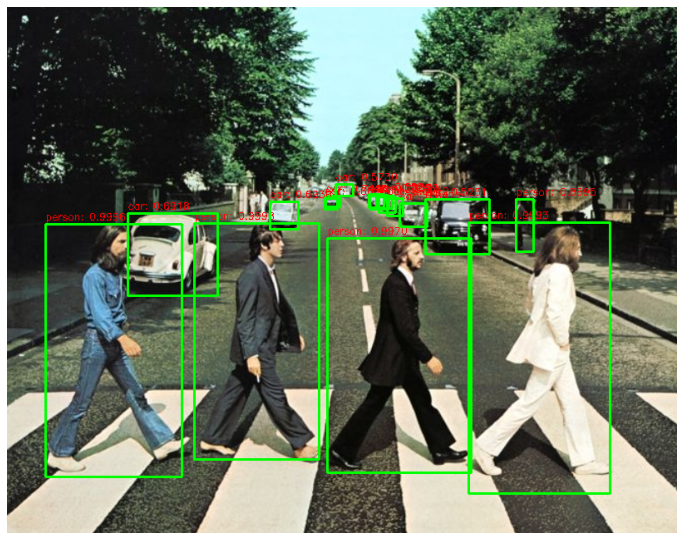

In [42]:
#이미지 로드
img = cv2.imread('./data/beatles01.jpg')
print('image shape:', img.shape)

#모델 로드
pb_path = "./pretrained/faster_rcnn_resnet50_coco_2018_01_28/frozen_inference_graph.pb"
pbtxt_path = "./pretrained/config_graph.pbtxt"

cv_net = cv2.dnn.readNetFromTensorflow(pb_path, pbtxt_path)

# Object Detetion 수행 후 시각화 
draw_img = get_detected_img(cv_net=cv_net, img_array=img, score_threshold=0.5, use_copied_array=True, is_print=True)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,12))
plt.imshow(img_rgb)
plt.axis("off")
plt.show()

#### 다른 이미지 테스트

In [43]:
!wget -O ./data/baseball01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/baseball01.jpg

--2021-09-13 01:42:20--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/baseball01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76279 (74K) [image/jpeg]
Saving to: ‘./data/baseball01.jpg’

./data/baseball01.j 100%[===================>]  74.49K  --.-KB/s    in 0.05s   

2021-09-13 01:42:21 (1.46 MB/s) - ‘./data/baseball01.jpg’ saved [76279/76279]



image shape: (476, 735, 3)
person: 0.9998
person: 0.9997
person: 0.9977
baseball glove: 0.9815
sports ball: 0.8867
baseball bat: 0.8420
Detection 수행시간: 0.95 초


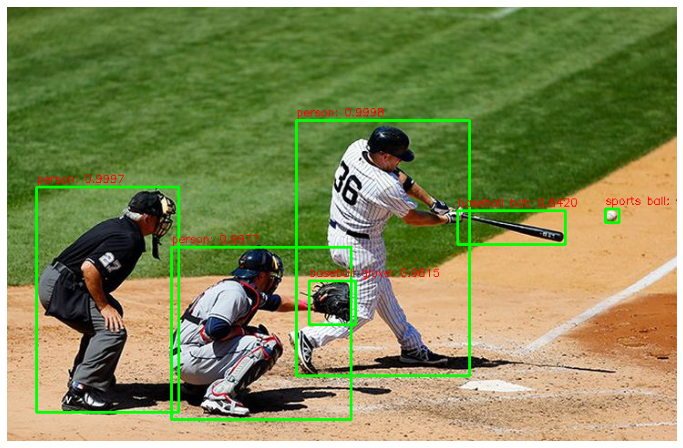

In [44]:
#이미지 로드
img = cv2.imread('./data/baseball01.jpg')
print('image shape:', img.shape)

#모델 로드
pb_path = "./pretrained/faster_rcnn_resnet50_coco_2018_01_28/frozen_inference_graph.pb"
pbtxt_path = "./pretrained/config_graph.pbtxt"

cv_net = cv2.dnn.readNetFromTensorflow(pb_path, pbtxt_path)

# Object Detetion 수행 후 시각화 
draw_img = get_detected_img(cv_net=cv_net, img_array=img, score_threshold=0.5, use_copied_array=True, is_print=True)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,12))
plt.imshow(img_rgb)
plt.axis("off")
plt.show()

### Video Object Detection 수행

In [45]:
!wget -O ./data/Jonh_Wick_small.mp4 https://github.com/chulminkw/DLCV/blob/master/data/video/John_Wick_small.mp4?raw=true

--2021-09-13 01:43:08--  https://github.com/chulminkw/DLCV/blob/master/data/video/John_Wick_small.mp4?raw=true
Resolving github.com (github.com)... 15.164.81.167
Connecting to github.com (github.com)|15.164.81.167|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/chulminkw/DLCV/raw/master/data/video/John_Wick_small.mp4 [following]
--2021-09-13 01:43:08--  https://github.com/chulminkw/DLCV/raw/master/data/video/John_Wick_small.mp4
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/John_Wick_small.mp4 [following]
--2021-09-13 01:43:09--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/John_Wick_small.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.10

#### VideoCapture와 VideoWriter 설정하기
* VideoCapture를 이용하여 Video를 frame별로 capture 할 수 있도록 설정
* VideoCapture의 속성을 이용하여 Video Frame의 크기 및 FPS 설정. 
* VideoWriter를 위한 인코딩 코덱 설정 및 영상 write를 위한 설정 

In [46]:
video_input_path = './data/Jonh_Wick_small.mp4'

cap = cv2.VideoCapture(video_input_path)
frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print('총 Frame 갯수:', frame_cnt)

총 Frame 갯수: 58


#### 위에서 만든 get_detected_img를 이용해서 Video Object Detection 함수 만들기

In [52]:
def do_detected_video(cv_net, input_path, output_path, score_threshold, is_print):
    
    cap = cv2.VideoCapture(input_path)
    
    codec = cv2.VideoWriter_fourcc(*"XVID")
    
    width = round(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    vid_size = (width, height)
    vid_fps = cap.get(cv2.CAP_PROP_FPS)
    
    vid_writer = cv2.VideoWriter(output_path, codec, vid_fps, vid_size)
    frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print("총 Frame 갯수:", frame_cnt)
    
    while True:
        hasFrame, img_frame = cap.read()
        
        if not hasFrame:
            print('더 이상 처리할 frame이 없습니다.')
            break
        
        img_frame = get_detected_img(cv_net, img_frame, score_threshold=score_threshold, use_copied_array=False, is_print = is_print)
        vid_writer.write(img_frame)
        
    vid_writer.release()
    cap.release()

In [53]:
do_detected_video(cv_net, "./data/Jonh_Wick_small.mp4", "./data/Jonh_Wick_small_02.mp4", 0.4, False)

OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


총 Frame 갯수: 58
car: 0.9882
car: 0.9622
person: 0.9495
car: 0.9266
car: 0.8772
motorcycle: 0.6607
car: 0.9881
car: 0.9643
person: 0.9581
car: 0.9318
car: 0.8992
motorcycle: 0.5682
person: 0.4459
car: 0.4418
bicycle: 0.4216
car: 0.4189
car: 0.9903
car: 0.9833
motorcycle: 0.9532
car: 0.9115
car: 0.8625
person: 0.7814
person: 0.5169
car: 0.4893
car: 0.4251
car: 0.9919
car: 0.9909
car: 0.9870
motorcycle: 0.8655
person: 0.7585
person: 0.7484
person: 0.7375
car: 0.7361
person: 0.7200
car: 0.6120
umbrella: 0.4362
car: 0.9933
car: 0.9817
motorcycle: 0.9781
car: 0.9530
car: 0.7823
person: 0.5313
person: 0.4869
truck: 0.4717
person: 0.4709
car: 0.9799
car: 0.9678
car: 0.9496
person: 0.8299
car: 0.6521
motorcycle: 0.6003
person: 0.4792
car: 0.4466
car: 0.4120
car: 0.9809
car: 0.9647
car: 0.9632
person: 0.8467
car: 0.7496
car: 0.6391
motorcycle: 0.5894
person: 0.5808
car: 0.4643
car: 0.9844
motorcycle: 0.9825
car: 0.9683
car: 0.9670
car: 0.5693
car: 0.4446
person: 0.4043
car: 0.9877
car: 0.9737
car

### 결과는 동영상을 다운받은 후 확인 ~!! 